In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../train_data/TrainingOriginal.csv')
len(data)

2407

In [3]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,MG_FE,FE_H_1,C_FE,N_FE,G,...,age_68L,ageErr,logAge,logAgeErr,distKpc,distKpc_68U,distKpc_68L,distErrKpc,logDistKpc,logDistKpcErr
0,1084,2M19210586+4512568,2127074448747065088,2.528896,4618.482422,0.249912,-0.297972,0.168490,0.056509,13.001588,...,8.9660,3.17035,1.019665,0.116141,2.131597,2.165136,2.094643,0.035247,0.328705,0.007188
1,1425,2M19275194+4432140,2126551802766566784,2.591600,4693.142578,-0.009744,0.024268,-0.020912,0.255499,11.797462,...,3.7584,1.25425,0.749427,0.111025,1.328182,1.352511,1.310690,0.020910,0.123258,0.006820
2,2872,2M19555453+4637075,2085505040840529408,2.505609,4856.208984,-0.000741,-0.004339,-0.048061,0.231635,10.448584,...,2.2688,0.13555,0.379795,0.024510,0.849586,0.856019,0.843995,0.006012,-0.070793,0.003072
3,2595,2M19492605+4733049,2086380458255298688,3.127957,4975.877930,0.014379,-0.069816,-0.062461,0.249710,11.898893,...,2.9854,0.85270,0.572616,0.098122,0.985641,1.000090,0.971628,0.014231,-0.006281,0.006270
4,1410,2M19273465+3850493,2052764470784039168,2.478781,4778.781738,-0.015421,0.057593,-0.039932,0.230346,11.588008,...,3.5892,0.54525,0.605617,0.057610,1.479203,1.492124,1.467236,0.012444,0.170028,0.003653


In [4]:
feats = ['LOGG', 'TEFF', 'MG_FE', 'FE_H_1', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K']

featsErr = ['LOGG_ERR', 'TEFF_ERR', 'MG_FE_ERR', 'FE_H_ERR', 'C_FE_ERR', 'N_FE_ERR',  \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR']

def norm(feat, eFeat):
    
    mu  = np.mean(feat)
    std = np.std(feat)
    
    scaledFeat  = (feat-mu)/std
    scaledEFeat = eFeat/std

    return(scaledFeat,scaledEFeat)

In [5]:
for i in range(len(feats)):
    scaledFeat, scaledEFeat = norm(data[feats[i]], data[featsErr[i]])
    data[feats[i]+'_NORM'] = scaledFeat
    data[featsErr[i]+'_NORM'] = scaledEFeat

In [6]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,MG_FE,FE_H_1,C_FE,N_FE,G,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,1084,2M19210586+4512568,2127074448747065088,2.528896,4618.482422,0.249912,-0.297972,0.168490,0.056509,13.001588,...,1.186168,0.000800,1.134530,0.000310,1.055206,0.026100,1.000818,0.024197,1.011641,0.012683
1,1425,2M19275194+4432140,2126551802766566784,2.591600,4693.142578,-0.009744,0.024268,-0.020912,0.255499,11.797462,...,-0.108056,0.000775,-0.179383,0.000424,-0.281557,0.024965,-0.313901,0.021893,-0.300468,0.017295
2,2872,2M19555453+4637075,2085505040840529408,2.505609,4856.208984,-0.000741,-0.004339,-0.048061,0.231635,10.448584,...,-1.523627,0.000479,-1.680417,0.000174,-1.799882,0.027235,-1.787629,0.070287,-1.850092,0.026519
3,2595,2M19492605+4733049,2086380458255298688,3.127957,4975.877930,0.014379,-0.069816,-0.062461,0.249710,11.898893,...,-0.087928,0.000713,0.002420,0.000277,0.103131,0.023830,0.127411,0.020741,0.156119,0.017295
4,1410,2M19273465+3850493,2052764470784039168,2.478781,4778.781738,-0.015421,0.057593,-0.039932,0.230346,11.588008,...,-0.340697,0.000595,-0.400786,0.000257,-0.424538,0.032908,-0.477520,0.036872,-0.460734,0.021907


In [7]:
N = len(feats)
mu_feats = np.ones(N)
std_feats = np.ones(N)

for i in range(len(feats)):
    mu_feats[i] = np.mean(data[feats[i]])
    std_feats[i] = np.std(data[feats[i]])

In [15]:
np.save('../train_data/AllGlobal_Mu_Final.npy', mu_feats)
np.save('../train_data/AllGlobal_Std_Final.npy', std_feats)

In [9]:
mu_feats[0]

2.733087790274848

In [17]:
np.mean(data['LOGG'])
len(data)

2407

In [16]:
data.to_csv('../train_data/AllTrainedNorm.csv')

In [12]:
data.head()

,Unnamed: 0,APOGEE_ID,source_id,LOGG,TEFF,MG_FE,FE_H_1,C_FE,N_FE,G,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,96,2M18505286+4432362,2105362083394042496,2.612084,4532.023438,0.079627,0.171318,0.098425,0.225120,11.437590,...,-0.488302,0.000614,-0.586660,0.000278,-0.699683,0.025141,-0.689540,0.024354,-0.713836,0.012764
1,1370,2M19263832+4240515,2125791318679254784,2.668956,4594.943848,0.007557,0.147208,0.051968,0.201030,12.541131,...,0.692942,0.000564,0.636076,0.000436,0.606529,0.028570,0.550177,0.019715,0.567173,0.018565
2,2583,2M19491405+4134233,2076894284238667904,2.571587,4655.399902,-0.024216,-0.026657,-0.011852,0.206955,9.852841,...,-2.204866,0.000801,-2.343344,0.000580,-2.482438,0.026284,-2.540415,0.033631,-2.546003,0.019726
3,1405,2M19272602+4221542,2125771390030125056,2.731084,4722.627930,0.007969,0.049620,0.014740,0.238237,12.800866,...,0.938827,0.000656,0.951186,0.000439,0.959651,0.023999,0.957230,0.019715,0.961686,0.018565
4,1584,2M19305546+3815037,2051928738868317440,2.938272,5037.334473,-0.054421,0.162278,-0.135970,0.452220,11.157132,...,-0.876825,0.000648,-0.826550,0.000287,-0.779678,0.025141,-0.694178,0.023194,-0.696431,0.020886


(array([ 21.,  54.,  97., 189., 279., 415., 459., 575., 310.,   8.]),
 array([ 8.90532112,  9.40657339,  9.90782566, 10.40907793, 10.9103302 ,
        11.41158247, 11.91283474, 12.41408701, 12.91533928, 13.41659155,
        13.91784382]),
 <BarContainer object of 10 artists>)

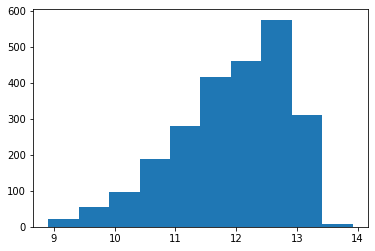

In [11]:
plt.hist(data['G'])

(array([ 21.,  54.,  97., 189., 279., 415., 459., 575., 310.,   8.]),
 array([-3.2885537 , -2.74450753, -2.20046136, -1.65641518, -1.11236901,
        -0.56832284, -0.02427667,  0.5197695 ,  1.06381567,  1.60786184,
         2.15190801]),
 <BarContainer object of 10 artists>)

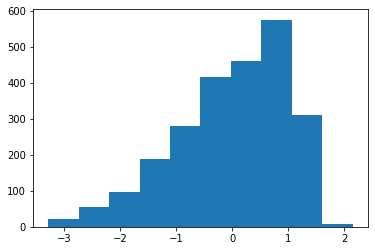

In [12]:
plt.hist((data['G']-np.mean(data['G']))/np.std(data['G']))

(array([ 21.,  49.,  99., 182., 299., 415., 461., 556., 322.,   8.]),
 array([-3.31367479, -2.76601863, -2.21836247, -1.67070631, -1.12305015,
        -0.57539399, -0.02773783,  0.51991833,  1.0675745 ,  1.61523066,
         2.16288682]),
 <BarContainer object of 10 artists>)

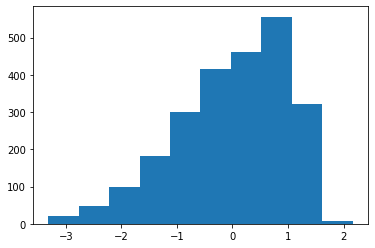

In [15]:
plt.hist(data['G_NORM'])

In [14]:
data.columns

Index(['Unnamed: 0', 'APOGEE_ID', 'source_id', 'LOGG', 'TEFF', 'MG_FE',
       'FE_H_1', 'C_FE', 'N_FE', 'G', 'BP', 'RP', 'J', 'H', 'K', 'LOGG_ERR',
       'TEFF_ERR', 'MG_FE_ERR', 'FE_H_ERR', 'C_FE_ERR', 'N_FE_ERR', 'G_ERR',
       'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR', 'age', 'age_68U',
       'age_68L', 'ageErr', 'logAge', 'logAgeErr', 'distKpc', 'distKpc_68U',
       'distKpc_68L', 'distErrKpc', 'logDistKpc', 'logDistKpcErr', 'LOGG_NORM',
       'LOGG_ERR_NORM', 'TEFF_NORM', 'TEFF_ERR_NORM', 'MG_FE_NORM',
       'MG_FE_ERR_NORM', 'FE_H_1_NORM', 'FE_H_ERR_NORM', 'C_FE_NORM',
       'C_FE_ERR_NORM', 'N_FE_NORM', 'N_FE_ERR_NORM', 'G_NORM', 'G_ERR_NORM',
       'BP_NORM', 'BP_ERR_NORM', 'RP_NORM', 'RP_ERR_NORM', 'J_NORM',
       'J_ERR_NORM', 'H_NORM', 'H_ERR_NORM', 'K_NORM', 'K_ERR_NORM'],
      dtype='object')

In [13]:
len(data)

2407